In [ ]:
import random
import time
import pandas as pd
def generate_sensor_data(n=100000):
  data = []
  for _ in range(n):
    temp = round(random.uniform(20, 35), 2)
    wind = round(random.uniform(0.9, 10), 2)
    precp = round(random.uniform(0, 60), 2)
    humidity = round(random.uniform(40, 70), 2)
    pressure = round(random.uniform(900, 1100), 2) # Added pressure feature
    vibration = round(random.uniform(0, 10), 2) # Added vibration feature
    label = 1 if temp > 30 and humidity > 60 else 0
    data.append([temp, wind, precp,humidity, pressure, vibration, label])
  return pd.DataFrame(data, columns=["Temperature","Wind","Precipitation", "Humidity", "Pressure", "Vibration", "Anomaly"])

df = generate_sensor_data(100000)
print(df)

       Temperature  Wind  Precipitation  Humidity  Pressure  Vibration  \
0            30.97  1.40          31.67     48.02    930.84       1.97   
1            27.59  3.00          45.82     47.58    912.44       3.14   
2            25.99  5.31          10.86     52.82   1035.90       7.13   
3            24.10  8.74          21.40     64.24   1044.05       2.91   
4            24.74  8.11          58.52     41.41    959.84       6.45   
...            ...   ...            ...       ...       ...        ...   
99995        33.64  9.75          55.60     46.90    938.67       2.50   
99996        26.70  1.51          13.76     42.01   1004.44       2.95   
99997        26.24  6.13           6.76     47.73   1071.62       1.17   
99998        26.66  7.83          20.46     61.95   1026.09       3.24   
99999        30.39  7.01          55.41     61.22   1075.59       7.66   

       Anomaly  
0            0  
1            0  
2            0  
3            0  
4            0  
...      

In [ ]:
print(df.head)

<bound method NDFrame.head of        Temperature  Wind  Precipitation  Humidity  Pressure  Vibration  \
0            30.97  1.40          31.67     48.02    930.84       1.97   
1            27.59  3.00          45.82     47.58    912.44       3.14   
2            25.99  5.31          10.86     52.82   1035.90       7.13   
3            24.10  8.74          21.40     64.24   1044.05       2.91   
4            24.74  8.11          58.52     41.41    959.84       6.45   
...            ...   ...            ...       ...       ...        ...   
99995        33.64  9.75          55.60     46.90    938.67       2.50   
99996        26.70  1.51          13.76     42.01   1004.44       2.95   
99997        26.24  6.13           6.76     47.73   1071.62       1.17   
99998        26.66  7.83          20.46     61.95   1026.09       3.24   
99999        30.39  7.01          55.41     61.22   1075.59       7.66   

       Anomaly  
0            0  
1            0  
2            0  
3            

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Save IoT data to Google Drive
df.to_csv('/content/drive/MyDrive/iot_sensor_data.csv', index=False)
print("Data saved to cloud storage (Google Drive)")


Mounted at /content/drive
Data saved to cloud storage (Google Drive)


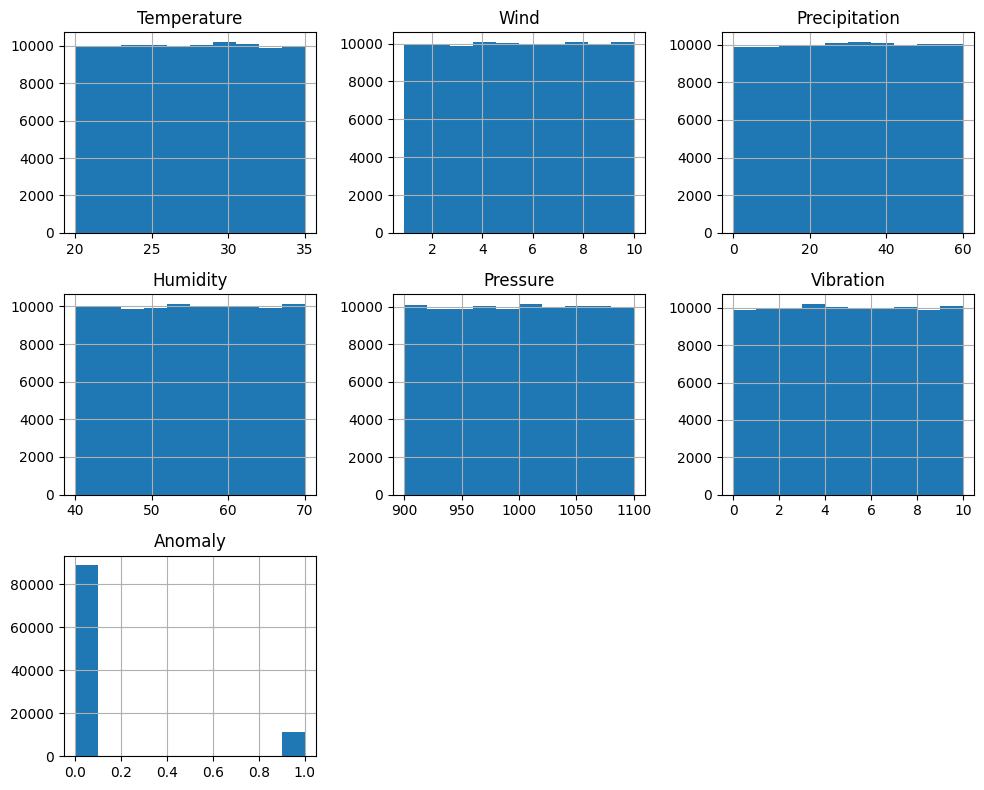

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of each feature
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

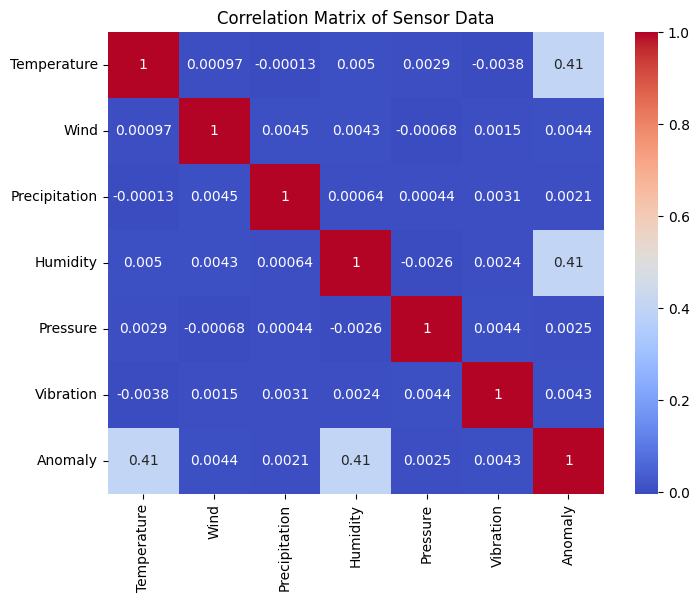

In [ ]:
# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Sensor Data')
plt.show()

In [ ]:
# Visualize the relationship between features and the anomaly label
sns.pairplot(df, hue='Anomaly')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop('Anomaly', axis=1)
y = df['Anomaly']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data splitting complete:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data splitting complete:
X_train shape: (80000, 6)
X_test shape: (20000, 6)
y_train shape: (80000,)
y_test shape: (20000,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

rf_clf.fit(X_train, y_train)
print("Random Forest Classifier training complete.")

Random Forest Classifier training complete.


In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)

svm_clf.fit(X_train, y_train)
print("Support Vector Machine training complete.")

Support Vector Machine training complete.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate SVM
y_pred_svm = svm_clf.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print("--- SVM Evaluation ---")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1-score: {f1_svm:.4f}")
print("-" * 34)

# Evaluate Random Forest Classifier
y_pred_rf_clf = rf_clf.predict(X_test)
accuracy_rf_clf = accuracy_score(y_test, y_pred_rf_clf)
precision_rf_clf = precision_score(y_test, y_pred_rf_clf)
recall_rf_clf = recall_score(y_test, y_pred_rf_clf)
f1_rf_clf = f1_score(y_test, y_pred_rf_clf)

print("--- Random Forest Classifier Evaluation ---")
print(f"Accuracy: {accuracy_rf_clf:.4f}")
print(f"Precision: {precision_rf_clf:.4f}")
print(f"Recall: {recall_rf_clf:.4f}")
print(f"F1-score: {f1_rf_clf:.4f}")
print("-" * 34)

--- SVM Evaluation ---
Accuracy: 0.8914
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
----------------------------------
--- Random Forest Classifier Evaluation ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
----------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Reshape data for CNN (add a channel dimension)
X_train_cnn = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
print("Training CNN model...")
cnn_model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, verbose=1)
print("CNN model training complete.")

# Evaluate the model (optional, can be done in a separate cell)
# loss, accuracy_cnn = cnn_model.evaluate(X_test_cnn, y_test, verbose=0)
# print(f"CNN Model Accuracy: {accuracy_cnn:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training CNN model...
Epoch 1/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8689 - loss: 1.7891
Epoch 2/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8884 - loss: 0.2520
Epoch 3/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8878 - loss: 0.2427
Epoch 4/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8909 - loss: 0.2286
Epoch 5/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8887 - loss: 0.2259
Epoch 6/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8891 - loss: 0.2172
Epoch 7/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8902 - loss: 0.2076
Epoch 8/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8905 - loss: 0.2038
Epoch 9/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8907 - loss: 0.1944
Epoch 10/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8903 - loss: 0.1913
Epoch 11/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8914 - loss: 0.1834
Epoch 

In [ ]:
# Evaluate the model
loss, accuracy_cnn = cnn_model.evaluate(X_test_cnn, y_test, verbose=0)
print(f"CNN Model Accuracy: {accuracy_cnn:.4f}")

CNN Model Accuracy: 0.9808


In [ ]:
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction
# You can adjust the number of components (n_components) as needed
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("Dimensionality reduction using PCA complete:")
print(f"Original training shape: {X_train.shape}")
print(f"Reduced training shape: {X_train_pca.shape}")
print(f"Original testing shape: {X_test.shape}")
print(f"Reduced testing shape: {X_test_pca.shape}")

Dimensionality reduction using PCA complete:
Original training shape: (80000, 6)
Reduced training shape: (80000, 2)
Original testing shape: (20000, 6)
Reduced testing shape: (20000, 2)


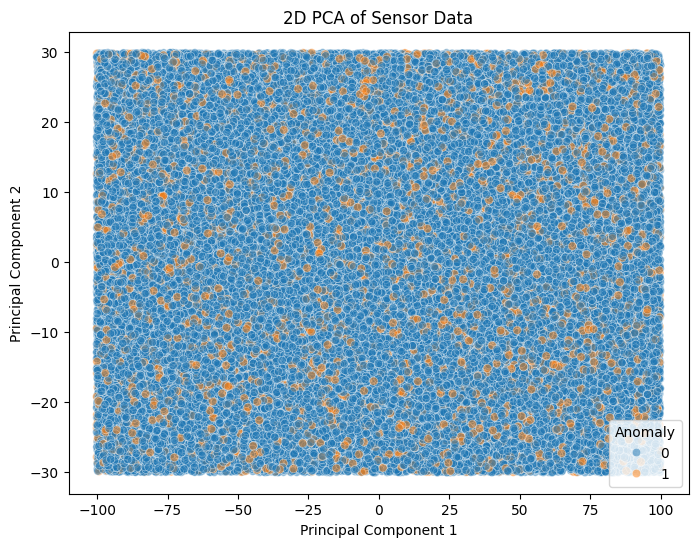

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame for the PCA results for easier plotting
pca_df = pd.DataFrame(data = X_train_pca, columns = ['principal component 1', 'principal component 2'])
pca_df['Anomaly'] = y_train.reset_index(drop=True)

# Visualize the PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='principal component 1', y='principal component 2', hue='Anomaly', data=pca_df, alpha=0.5)
plt.title('2D PCA of Sensor Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()